In [29]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
#matplotlib inline

Ahora para generar los datos usamos los mismos que en la tarea anterior

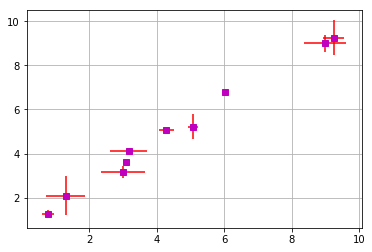

In [30]:
Num= 10 #numero de datos
C_i= 0. #cota inferior
C_s= 10. #Cota superior

a = np.random.uniform(C_i, C_s, Num)
x=sort(a)
d = np.random.uniform(0.0,1,len(x))
y = x+d
# para sus barras de error
x_e=np.random.normal(0.1,0.4,len(x))
y_e=np.random.normal(0.1,0.4,len(y))
# graficar
plt.plot(x,y,'o',color='b')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.grid(True)

In [37]:
def modelo(x,m,b):
    return m*x+b
chi_2= lambda m,b:(((y-modelo(x,m,b))**2)/(y_e)**2).sum()
chi_2= np.vectorize(chi_2)

In [60]:
pendiente=np.random.uniform(0,2,10**5)
ordenada =np.random.uniform(0,2,10**5)

pendiente.sort()
ordenada.sort()

$\chi^2$
(array([45285], dtype=int32),)
Pendiente
[0.90828777]
Ordenada
[0.90995997]
Que le corresponde a una $\chi^2$
[74.96556976]


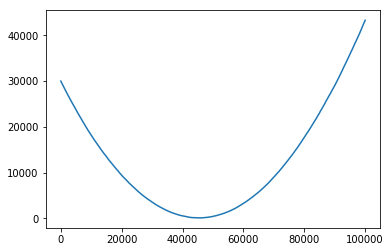

In [61]:
chi_sq = chi_2(pendiente,ordenada)
print ('$\chi^2$')
plot(chi_sq)
minimo_valor=np.where(chi_sq == np.min(chi_sq ))
print(minimo_valor)
m_mejor= pendiente[minimo_valor]
b_mejor= ordenada[minimo_valor]
chi_mejor=chi_sq[minimo_valor]
print ('Pendiente')
print(m_mejor)
print('Ordenada')
print(b_mejor)
print('Que le corresponde a una $\chi^2$')
print(chi_mejor)


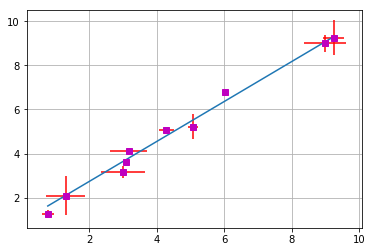

In [63]:
plt.plot(x,chi(x, m_mejor, b_mejor))
#plt.plot(x,chi(x, 1, 1))
plt.plot(x,y,'.',color='b')
plt.errorbar(x,y,xerr=x_e,yerr=y_e,fmt='ms',ecolor='r')
plt.grid(True)

Algoritmo Metropolis

In [83]:
#valores iniciales
m0 = 0.3
b0 = 0.1
sigma_m = 0.07
sigma_b = 0.05
#numero de pasos
puntos = 10**3 
#contadoresLista
mList=[]
bList=[]
mList.append(m0) 
bList.append(b0)

In [84]:
for a in range(puntos):
    Oldm0=mList[-1]
    Oldb0=bList[-1]
    m_New=np.random.normal(Oldm0,sigma_m)
    b_New=np.random.normal(Oldb0,sigma_b)
#  print "nuevo punto=",newpoint1,newpoint2
    ratio=chi_2(Oldm0,Oldb0)-chi_2(m_New,b_New)
#  print "radio=",ratio
    if ratio > 0:
        mList.append(m_New)
        bList.append(b_New)
        aceptados+=1
    else:
        e=math.exp(ratio/2)
        ale=np.random.uniform(0.0,1.0)
        if e > ale:
            mList.append(m_New)
            bList.append(b_New)
            aceptados+=1
        else:
            mList.append(Oldm0)
            bList.append(Oldb0)


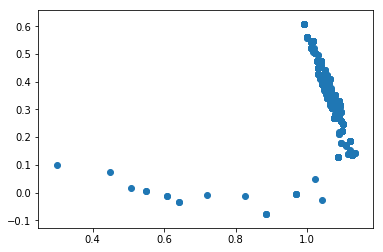

In [90]:
plt.scatter(mList,bList)
plt.show()

In [546]:
def likelihood(x,y,e_y,m,b):
    k=np.prod(1./(np.sqrt(2.*np.pi)*y_e))
    l=np.exp(-(y-(m*x+b)**2)/(2.*(y_e)**2))
    return k*l

def prior(m,b):
    if (0<m<2) and (-2<b<2):
        p=0
        return p
    else:
        p=-np.infty
        return p
    return p


In [562]:
m_New= np.random.normal(m_0,sigma_m)
b_New=np.random.normal(b_0,sigma_b)
#prob_New= likelihood(x,y,y_e,m_New,b_New)
#print(prob_New)

In [627]:
# MCMC
for i in range(N):
    m_New= np.random.normal(m_0,sigma_m)
    b_New=np.random.normal(b_0,sigma_b)
    if (prior(m_New,b_New)):
        m_New=m_0
        b_New=b_0
        prob_New= likelihood(x,y,y_e,m_New,b_New)
        prob_Old= likelihood(x,y,y_e,m_0,b_0)
        dentroContador=1
        print(1)
        if ((prob_New/prob_Old)>1):
            m_0=m_New
            b_0=b_New
            prob=prob_New
            dentroContador=1
            print(2)
        else:
            prob_test=np.random.uniform(0,1)
            if (prob_test>prob_New/prob_Old):
                m_0=m_0
                b_0=b_0
                prob=prob_Old
                print(3)
            else:
                m_0=m_New
                b_0=b_New
                prob=prob_New
                print(4)
                
                cadenam.append(m_0)
                cadenap.append(p_0)
        probs.append(prob)
        mm=[m_0 for m_0,b_0 in cadenam]
        bb=[b_0 for m_0,b_0 in cadenab]
      
        mejores=np.argmax(probs)
        mejor_m=mm[mejores]
        mejor_b=bb[mejores]
        print(mm)

#plot.scatter(mm,bb,s=3,lw=0)
#plot.plot(mejor_m,mejor_b,'ko',label='Best m,b',markersize=5,markerfacecolor='r')
#plt.show()
#--------
#plot(M_New,B_New)
#scatter(mList,bList)
#plt.show()

In [629]:
plot.plot(mm,bb,s=3,lw=0)
plot.plot(mejor_m,mejor_b,'ko',label='Best m,b',markersize=5,markerfacecolor='r')
plt.show()

AttributeError: 'function' object has no attribute 'plot'

TypeError: only size-1 arrays can be converted to Python scalars

In [86]:
def CaDeMa(theta_0,theta_i):
    if (lnprior(theta_i)):
        return theta_0
    p_0=lnlike(theta_0)
    p_i=lnlike(theta_i)
    p_acc=np.exp(p_i - p_0)
    p_acc=min(1.,p_acc)
    if (p_acc>x):
        return theta_i
    else:
        return theta_0
    return 
    

In [ ]:
NumMuestras=100
Sigma_0=1
Sigma_1=0.1

NumCadenas=10

theta_0=[50.,0.3]
cadena=[]
for j in range(NumCadenas):
    theta_0=np.array([np.random.normal(theta_0[0],Sigma_0),np.random.normal(theta_0[1],Sigma_1)])
for i in range(NumMuestras):
       if i==0:
        cadena = theta_0
        else:
            theta_i=np.array([np.random.normal(theta_0[0],Sigma_0),np.random.normal(theta_0[1],Sigma_1)])
            theta_nueva=CaDeMa(theta_0,theta_i)
            cadena=np.concatenate((cadena,theta_nueva))
            theta_0=theta_nueva
if j==0:
    cadenas=cadena
else:
    cadena=np.vstack(cadenas,cadena)